# TEST

In [22]:
import json
def get_data(txt_file):
    with open(txt_file, "r") as f:
        gt = json.load(f)
    
    data={example['id'] : example for example in gt}

    return data

In [23]:
test_set = get_data('data/test/test_set_task3.txt')

In [24]:
print(test_set.keys())

dict_keys(['705_batch_2', '706_batch_2', '710_batch_2', '713_batch_2', '715_batch_2', '716_batch_2', '720_batch_2', '722_batch_2', '723_batch_2', '724_batch_2', '725_batch_2', '726_batch_2', '727_batch_2', '732_batch_2', '733_batch_2', '736_batch_2', '738_batch_2', '740_batch_2', '741_batch_2', '744_batch_2', '746_batch_2', '748_batch_2', '750_batch_2', '753_batch_2', '754_batch_2', '758_batch_2', '759_batch_2', '763_batch_2', '765_batch_2', '766_batch_2', '767_batch_2', '770_batch_2', '771_batch_2', '775_batch_2', '778_batch_2', '779_batch_2', '781_batch_2', '782_batch_2', '783_batch_2', '785_batch_2', '787_batch_2', '789_batch_2', '790_batch_2', '794_batch_2', '795_batch_2', '798_batch_2', '799_batch_2', '802_batch_2', '803_batch_2', '804_batch_2', '805_batch_2', '806_batch_2', '808_batch_2', '813_batch_2', '814_batch_2', '815_batch_2', '816_batch_2', '817_batch_2', '819_batch_2', '822_batch_2', '824_batch_2', '825_batch_2', '828_batch_2', '829_batch_2', '830_batch_2', '832_batch_2',

In [25]:
label2idx = {}
for k in test_set.keys():
    labels = test_set[k]['labels']
    for label in labels:
        if label not in label2idx:
            label2idx[label] = len(label2idx)
            
idx2label = {}
for k, v in label2idx.items():
    idx2label[v] = k


In [26]:
print(idx2label)
print(label2idx)

{0: 'Name calling/Labeling', 1: 'Slogans', 2: 'Smears', 3: 'Transfer', 4: 'Appeal to (Strong) Emotions', 5: 'Appeal to fear/prejudice', 6: 'Loaded Language', 7: 'Doubt', 8: 'Exaggeration/Minimisation', 9: 'Whataboutism', 10: 'Reductio ad hitlerum', 11: 'Obfuscation, Intentional vagueness, Confusion', 12: 'Glittering generalities (Virtue)', 13: 'Black-and-white Fallacy/Dictatorship', 14: 'Flag-waving', 15: 'Presenting Irrelevant Data (Red Herring)', 16: 'Appeal to authority', 17: 'Thought-terminating cliché', 18: 'Repetition', 19: "Misrepresentation of Someone's Position (Straw Man)", 20: 'Causal Oversimplification', 21: 'Bandwagon'}
{'Name calling/Labeling': 0, 'Slogans': 1, 'Smears': 2, 'Transfer': 3, 'Appeal to (Strong) Emotions': 4, 'Appeal to fear/prejudice': 5, 'Loaded Language': 6, 'Doubt': 7, 'Exaggeration/Minimisation': 8, 'Whataboutism': 9, 'Reductio ad hitlerum': 10, 'Obfuscation, Intentional vagueness, Confusion': 11, 'Glittering generalities (Virtue)': 12, 'Black-and-white 

In [77]:
results_test = {}
with open("results/grounding_prompt2_shot3.txt", "r") as reader:
    lines = reader.readlines()
    for idx, line in enumerate(lines):
        if "Generating for meme:" in line:
            meme_idx = line.split("Generating for meme:")[1].strip()
            meme_content = lines[idx+1].strip().replace("[", "").replace("]", "").replace("\"", "")
            results_test[meme_idx] = meme_content

In [78]:
print(results_test)
print(len(results_test.keys()))

{'705_batch_2': 'Loaded Language', '706_batch_2': 'Appeal to fear/prejudice, Smears', '710_batch_2': 'Loaded Language', '713_batch_2': 'Appeal to fear/prejudice, Smears', '715_batch_2': 'Loaded Language', '716_batch_2': 'Appeal to (Strong) Emotions, Loaded Language, Name calling/Labeling', '720_batch_2': '', '722_batch_2': 'Loaded Language, Smears', '723_batch_2': '', '724_batch_2': 'Loaded Language', '725_batch_2': 'Smears', '726_batch_2': '2', '727_batch_2': '25', '732_batch_2': 'Appeal to fear/prejudice, Loaded Language', '733_batch_2': 'Loaded Language', '736_batch_2': 'Loaded Language, Smears', '738_batch_2': 'Appeal to (Strong) Emotions, Appeal to fear/prejudice', '740_batch_2': '10', '741_batch_2': 'Appeal to (Strong) Emotions', '744_batch_2': 'Appeal to (Strong) Emotions, Authority', '746_batch_2': 'Causal Oversimplification', '748_batch_2': 'Causal Oversimplification', '750_batch_2': 'Appeal to fear/prejudice', '753_batch_2': 'Loaded Language', '754_batch_2': 'Appeal to fear/p

In [79]:
preditions_test = []
ground_truth_test = []
for k in results_test.keys():
    meme = results_test[k]
    gt_labels = test_set[k]['labels']
    preds = [0 for _ in range(22)]
    labels_one_hot = [0 for _ in range(22)]
    for label in gt_labels:
        labels_one_hot[label2idx[label]] = 1
    for label, idx in label2idx.items():
        if label.lower() in meme.lower():
            preds[idx] = 1
    preditions_test.append(preds)
    ground_truth_test.append(labels_one_hot)

In [80]:
from sklearn.metrics import f1_score
import numpy as np

total_corr = 0
total_micro_f1 = 0
total_macro_f1 = 0
total_fp_test = np.zeros(22)
total_fn_test = np.zeros(22)

preditions_test = np.array(preditions_test)
ground_truth_test = np.array(ground_truth_test)

for preds, labels in zip(preditions_test, ground_truth_test):
    total_corr += (preds == labels).mean()
    total_micro_f1 += f1_score(labels, preds, average="micro")
    total_macro_f1 += f1_score(labels, preds, average="macro")
    total_fp_test += (preds > labels)
    total_fn_test += (preds < labels)

print("Accuracy: ", total_corr/len(preditions_test))
print("Micro F1: ", total_micro_f1/len(preditions_test))
print("Macro F1: ", total_macro_f1/len(preditions_test))


Accuracy:  0.8606818181818179
Micro F1:  0.8606818181818179
Macro F1:  0.5569107290978994


In [72]:
from matplotlib import pyplot as plt 
import seaborn as sns 

total_label = ["Appeal to authority",
"Appeal to fear/prejudice",
"Black-and-white Fallacy/Dictatorship",
"Causal Oversimplification",
"Doubt",
"Exaggeration/Minimisation",
"Flag-waving",
"Glittering generalities (Virtue)",
"Loaded Language",
"Misrepresentation of Someone's Position (Straw Man)",
"Name calling/Labeling",
"Obfuscation, Intentional vagueness, Confusion",
"Presenting Irrelevant Data (Red Herring)",
"Reductio ad hitlerum",
"Repetition",
"Slogans",
"Smears",
"Thought-terminating cliché",
"Whataboutism",
"Bandwagon",
"Transfer",
"Appeal to (Strong) Emotions"] 

Text(0.5, 1.0, 'Error distribution of test data')

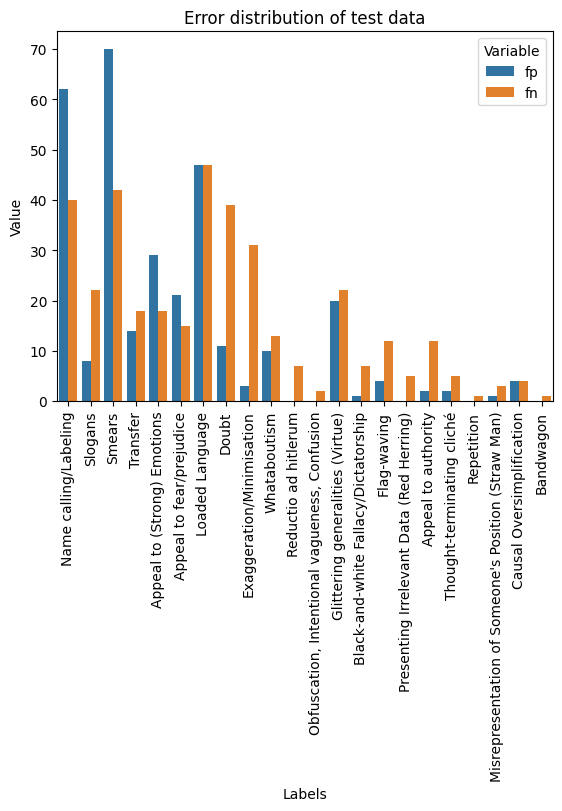

In [32]:
import pandas as pd

test_distribution = {"labels": [idx2label[i] for i in range(22)], "fp": total_fp_test.tolist(), "fn": total_fn_test.tolist()}
df = pd.DataFrame(test_distribution)
# fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='labels').rename(columns=str.title)
sns.barplot(x='Labels', y='Value', hue='Variable', data=tidy)
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.title("Error distribution of test data")

Text(0.5, 1.0, 'Error distribution of test data')

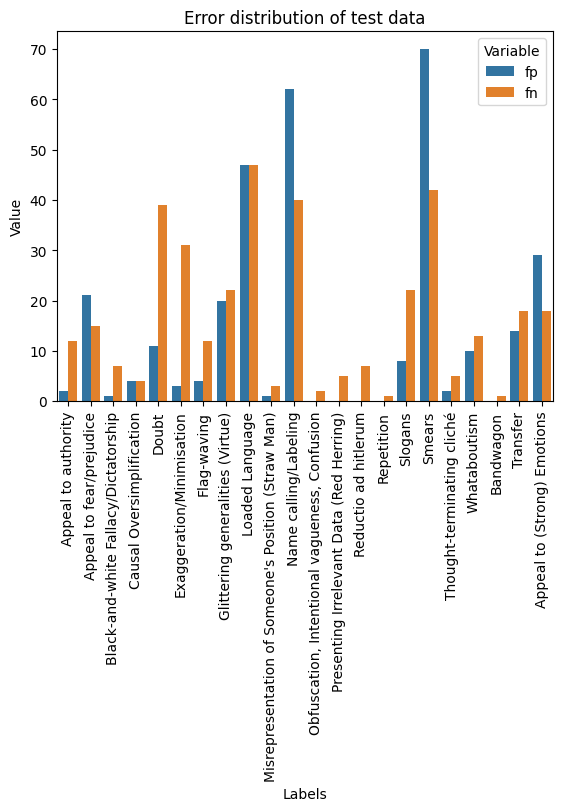

In [33]:
import pandas as pd

total_fp_sort = [total_fp_test[label2idx[label]] for label in total_label]
total_fn_sort = [total_fn_test[label2idx[label]] for label in total_label]
test_distribution = {"labels": total_label, "fp": total_fp_sort, "fn": total_fn_sort}
df = pd.DataFrame(test_distribution)
# fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='labels').rename(columns=str.title)
sns.barplot(x='Labels', y='Value', hue='Variable', data=tidy)
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.title("Error distribution of test data")